In [8]:
import json, csv, string, datetime, re
from dateutil.parser import parse
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

### Visualizando os dados

In [2]:
data = pd.read_json('DATASET.json', lines = True)
data.head()
#YYYY-MM-DD

,data,geo,id,nome,text
0,Sun May 06 20:41:33 +0000 2018,"[19.59433331, -155.97172783]",2.379071e+09,tiedyehobo,"majic sands beach, kona hawaiiawesome tunes by..."
1,Sun May 06 20:33:41 +0000 2018,"[19.56034, -154.9866]",2.929292e+07,queeraspoetry,Good am! 🤙🌋 @ Center for Spiritual Living in H...
2,Sun May 06 20:30:04 +0000 2018,"[19.0781667, -155.1876667]",8.149151e+17,Hazards_Network,Monday-January-2018::15:14: An earthquake of m...
3,Sun May 06 20:09:43 +0000 2018,"[20.02027778, -155.66777778]",4.142280e+08,NaomiCooper808,"#vacay #Ladat @ Waimea, Hawaii County, Hawai"
4,Sun May 06 19:46:08 +0000 2018,"[19.65, -155.994]",2.011251e+07,vioart527,"Last sunset in Hawaii . . . until next time,"


### Formatando datas

In [205]:
def parse_datetime(value):
    time_tuple = parsedate_tz(value)
    timestamp  = mktime_tz(time_tuple)
    return datetime.datetime.fromtimestamp(timestamp)

times = { "data": [], "time": [], "lat":  [], "long": [] }
for x, k in zip(data['data'].apply(parse), data['geo']):
    time_out = str(x).split(" ")
    geo_out  = k.replace("[","").replace("]","").split(',')
    times["data"].append(time_out[0])
    times["time"].append(str(time_out[1]).replace("+00:00",""))
    times["lat"].append(geo_out[0])
    times["long"].append(geo_out[1])
    
#Atualizações no dataframe
data['data'] = pd.Series(times['data'])
data['time'] = pd.Series(times['time'])
data['lat']  = pd.Series(times['lat'])
data['long'] = pd.Series(times['long'])
data.pop('geo')
data.columns = ['date', 'id_str','user_name','text', 'time', 'latitude', 'longitude']

In [206]:
data.head()

,date,id_str,user_name,text,time,latitude,longitude
0,2018-05-06,2.379071e+09,tiedyehobo,"majic sands beach, kona hawaiiawesome tunes by...",20:41:33,19.59433331,-155.97172783
1,2018-05-06,2.929292e+07,queeraspoetry,Good am! 🤙🌋 @ Center for Spiritual Living in H...,20:33:41,19.56034,-154.9866
2,2018-05-06,8.149151e+17,Hazards_Network,Monday-January-2018::15:14: An earthquake of m...,20:30:04,19.0781667,-155.1876667
3,2018-05-06,4.142280e+08,NaomiCooper808,"#vacay #Ladat @ Waimea, Hawaii County, Hawai",20:09:43,20.02027778,-155.66777778
4,2018-05-06,2.011251e+07,vioart527,"Last sunset in Hawaii . . . until next time,",19:46:08,19.65,-155.994


### Filtros de Limpeza

In [207]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_dots(text):
    return  re.compile(
        f'[{re.escape(string.punctuation)}]'
    ).sub(' ', text)

def remove_stopwords(text):
    stemmer = SnowballStemmer("english")
    make   = TweetTokenizer()
    tokens = make.tokenize( remove_dots( remove_numbers(text) ) )
    return [w.lower() for w in tokens if not w in set(stopwords.words('english'))]

In [208]:
for k, x in enumerate(data['text']):
    data.loc[k,'text'] = str(" ".join(remove_stopwords(x)))

# Removendo conteúdo duplicado

In [209]:
#mostando perfis de spam
#similaridade dos spams/bots ...  
#Mesmo horário, mesmo conteúdo da msg, mesma lat e long
spams = data[data['text'].duplicated(keep = False)]
spams

,date,id_str,user_name,text,time,latitude,longitude
0,2018-05-06,2.379071e+09,tiedyehobo,majic sands beach kona hawaiiawesome tunes car...,20:41:33,19.59433331,-155.97172783
1,2018-05-06,2.929292e+07,queeraspoetry,good 🤙 🌋 center spiritual living hawai,20:33:41,19.56034,-154.9866
2,2018-05-06,8.149151e+17,Hazards_Network,monday january an earthquake magnitude shook k...,20:30:04,19.0781667,-155.1876667
3,2018-05-06,4.142280e+08,NaomiCooper808,vacay ladat waimea hawaii county hawai,20:09:43,20.02027778,-155.66777778
4,2018-05-06,2.011251e+07,vioart527,last sunset hawaii next time,19:46:08,19.65,-155.994
5,2018-05-06,2.379071e+09,tiedyehobo,uzygxss tiedyehobo tiedye hippie hawaii tiedyehob,18:52:58,19.52575,-155.92358
6,2018-05-06,1.864570e+07,syvideo,adventures covering lava flow hilo hi leilani ...,18:18:05,19.4735,-154.92
7,2018-05-06,1.882971e+07,rodney_o,breakfast pahala leftovers rustyshawaiian coff...,18:15:13,19.204109,-155.479005
8,2018-05-06,4.934616e+08,ashleyyyz3,home 🍃 napoopoo hawai,17:52:28,19.4764,-155.923
9,2018-05-06,1.714726e+09,itsnotben,hawaii round hours airplane earthquakes volcan...,17:38:12,19.431649,-155.21687


### Removendo perfis de conteúdo duplicado/spam

In [210]:
#pegando os 'user_name' do perfis spams
for names in set(spams['user_name']):
    print(names)
    #Essa linha exclui todos os perfis com base no indice de cada 'user_name'
    data.drop(data[data['user_name'] == names ].index, inplace = True)

# teste de perfil deletado
#data[data['user_name'].str.match('QuakesToday')]

Cerrinia
tmj_hi_sales
5oclockbot
ShortiniPhotog
zeketomaselli
alikaboy4music
Indica_Honey
AprilLButcher
tmj_HI_cstsrv
QuakesToday
Randall_Shirley
evee
tmj_mau_cosmo
jammaquino
object82
miu_north
BeckBBeck
Dieuwkevdpol
arielkcurry
tmj_HI_facmgmt
Quake_Tracker4
TrevorHughes
MaddestMax
iamcamjones
Verticalviking
RasSparrow
mike_herron
selphie6999
NaomiCooper808
u_nagi2356
chrisjb
JchanKchan
jaywashradio
AlxKawakami
eq_map_es2
AngelaConners_
GeorgeIzvernari
captainm56
tmj_usa_aero
ashleyyyz3
AnneMurata
NewEarthquake
paparacchi
fafjrock
therealmrsHDUB
PineappleClan
queeraspoetry
AAgbayani
MauiDarci
Joechris1988
ProjectVisionHI
KonaHomeTeam
RobertPerryHI
thesnorkelstore
glemaud
eq_map_es
HiloHennaHut
satoko0518
PattyKWilliams
BigEarthquakes
OptimisticVibe1
tmj_HI_skltrd
ekgeee
vinillaskyz
earthshook
DuckSoSoft
ChiokeMusic
sannebuurma
tmj_mau_retail
Hazards_Network
tmj_hi_retail
autoRNG
DamienAwai
WordsOfVikram
MichaelVergona
espejomx
FindingBeauty_M
LahainaGallery
welshietouring
Electric_Sur

### Removendo perfils de spam manualmente 

In [211]:
#data[data['user_name'].str.contains("tmj_")] #mostra quais perfis tem relação com tmj_  ...
#Foi observado que quase sempre os perfis que propagavam spam, ou msg não relacionadas ao desastre.
data = data[~ data['user_name'].str.contains("tmj")]
data = data[~ data['user_name'].str.contains("eq_map")]
data = data[~ data['user_name'].str.contains("HiloHawaii_")]
data = data[~ data['user_name'].str.contains("5oclockbot")]

# Encontrando Interesse

In [212]:
data.head()

,date,id_str,user_name,text,time,latitude,longitude
1725,2018-05-29,401257758.0,ArcturusFlyer,south point,01:06:45,18.9121422,-155.6819064
1727,2018-05-29,71276351.0,HI_physician,want work envision we hiring kealakekua hi cli...,01:06:02,19.5208333,-155.9225
1758,2018-05-28,618294231.0,_grammar_,it drcameronmurray could posted “ time missing...,23:34:00,18.21528411,-155.82388267
1762,2018-05-28,19560314.0,rockyrooo,yum yum yum yum yum drinking malolo special pa...,22:58:43,20.0247,-155.662
1771,2018-05-28,19560314.0,rockyrooo,never lined red ipa drinking red giant ale big...,22:48:18,20.0247,-155.662


In [213]:
words = list(set(remove_stopwords(
    str(open('disasters_words.txt').readlines())
)))
words

['wave',
 'erupting',
 'survive',
 'meal',
 'airfall',
 'jittery',
 'fissures',
 'wasted',
 'erupts',
 'dwelling',
 'vulcao',
 'solfatara',
 'tilt',
 'conduit',
 'uneasy',
 'asylum',
 'disturbed',
 'tephra',
 'basalt',
 'diasters',
 'kilauea',
 'remove',
 'slag',
 'nervy',
 'seimicity',
 'scared',
 'ruined',
 'trembler',
 'prayers',
 'caldera',
 'contribution',
 'luapele',
 'shattered',
 'evacuation',
 'restless',
 'vapor',
 'reliefsubsidy',
 'concerned',
 'volcanoes',
 'abandon',
 'crater',
 'killed',
 'imploring',
 'sustenance',
 'amplitude',
 'mainshock',
 'fog',
 'microseism',
 'ashes',
 'volcanic',
 'shelters',
 'quit',
 'laze',
 'uptight',
 'vulcan',
 'clinic',
 'evacee',
 'epicentre',
 'shock',
 'leilani',
 'evacuee',
 'withdraw',
 'transport',
 'repose',
 'feed',
 'safe',
 'terremoto',
 'seismism',
 'aghast',
 'refuge',
 'aid',
 'block',
 'disintegrated',
 'tectonic',
 'pahalacloud',
 'craving',
 'volcano',
 'emission',
 'rationrefreshment',
 'flow',
 'risk',
 'petition',
 'and

In [214]:
data['text'][3216]

'these images surreal 🌋 many displaced others'

In [215]:
#Tamanho médio das palavras em inglês https://arxiv.org/pdf/1208.6109.pdf
#Cria uma dataSerie para ser adicionado ao dataFrame
a = []    
def normalize_text():
    
    data['interest'] = False
    
    for index in data.index:
        text = data['text'][index]
        result = pd.Index(remove_stopwords(text)).intersection(pd.Index(words)) 
        
        if len(result) != 0:
            a.append(result[0])
            data.loc[index, 'interest'] = True
normalize_text()

In [216]:
#Do dicionário, essas são as palavras que retornaram!
a = list(set(a))
result = {}
for x in a:
    qtd = len(data[data['text'].str.contains(x)])
    result.update({x: qtd})

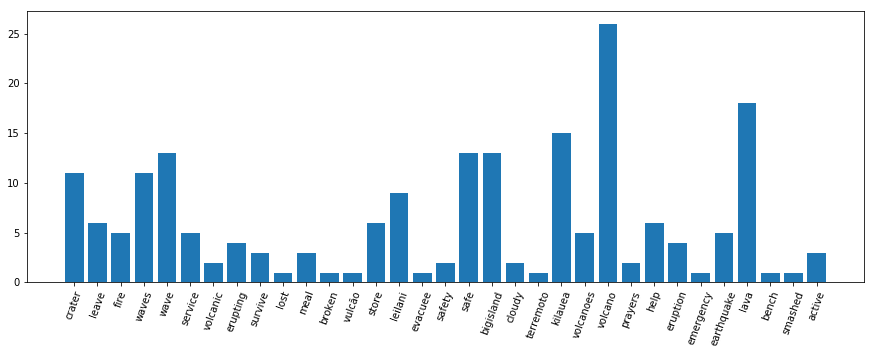

In [225]:
import numpy as np
import matplotlib.pyplot as plt

indexes = np.arange(len(result.keys()))
plt.figure(figsize = (15, 5))
plt.bar(indexes, list(result.values())) 
plt.xticks(indexes, list(result.keys()), rotation = 70)
plt.show()

In [218]:


data[data['text'].str.contains('help')]

,date,id_str,user_name,text,time,latitude,longitude,interest
2352,2018-05-09,4.984026e+07,insidejobrob,this zoo helps animals recover boo,07:16:00,20.90452,-156.28218,False
3254,2018-05-06,4.650582e+08,allkinecrossfit,taking care mental physical spiritual health h...,22:42:29,20.90556,-156.48851,False
3403,2018-05-06,6.008882e+07,sandydion,eddiebauer whyihike contest i hike helps decom...,14:48:25,20.95104933,-156.51734768,False
5023,2018-05-03,7.349326e+17,acityexplored,out office if need immediate help please contact,02:33:48,21.0008086,-156.6538499,True
5168,2018-05-02,2.339822e+07,oldfartjeff,tips i give people i ’ talked help generate sa...,18:31:18,20.8868816,-156.4774079,True
5401,2018-05-02,7.117604e+17,missionmolokai,blessed able help others island one ladies church,01:41:04,21.09657047,-157.03540845,True


In [25]:
data[data['interest'] == True]

,date,id_str,user_name,text,time,latitude,longitude,interest
2114,2018-05-25,2.164855e+08,CDRP_FSU,cdrp spent week hawaii working volcano crasar ...,01:55:48,19.47620833,-154.89601167,True
2145,2018-05-24,1.956031e+07,rockyrooo,drinking fire rock konabrewingco laverne sport...,21:51:19,19.634,-155.99,True
2185,2018-05-23,3.314297e+07,FOX40,man defending hawaii home volcano hit by flami...,14:34:58,19.497503,-154.95081,True
2191,2018-05-23,2.427974e+08,erivaldoff,i lava lava beach club kamuela h,02:34:30,19.91335475,-155.88807723,True
2242,2018-05-21,2.861508e+09,Palms311,hawaiinewsnow what going kahului airport massi...,20:56:50,20.89,-156.45,True
2265,2018-05-20,3.022061e+08,LithiaJobs,see latest kahului hi job click apply service ...,23:03:40,20.8901116,-156.4614301,True
2268,2018-05-20,1.559525e+07,rolodj,i island lava java bistro amp grill lavajavaha...,22:09:15,19.63532716,-155.99023643,True
2277,2018-05-20,1.058711e+09,E2EJobs,see latest hi job click apply customer service...,14:15:10,19.6399924,-155.9969052,True
2289,2018-05-09,4.316392e+07,GevaNeva,island of hawai volcano updateofficial stateme...,14:00:11,19.49378056,-155.00968889,True
2315,2018-05-09,4.945080e+08,garrickpeters,this cloud cover brings amazing light maui,09:06:46,20.66347782,-156.44132085,True


In [26]:
data.sort_values(by = 'user_name')

,date,id_str,user_name,text,time,latitude,longitude,interest
2406,2018-05-09,2.992176e+08,0wwl,island living 🏝 🥥 🌺 kapalua hawai,03:44:09,20.9967,-156.653,False
5042,2018-05-03,1.291239e+09,1fsmith1,blessed home hawai ’ weeks kanaka kav,01:25:05,19.6346908,-155.9898393,False
5837,2018-04-30,1.209477e+08,1hawaiiboy,spirits sansei waikolo,23:31:26,19.91383842,-155.87940562,False
5281,2018-05-02,1.209477e+08,1hawaiiboy,pint shot guinness tullamoredew,09:01:52,19.92545,-155.88433,False
2594,2018-05-08,1.209477e+08,1hawaiiboy,the tools ready afternoon strawberry mules kal...,20:13:31,19.723,-156.005,False
2528,2018-05-08,1.534514e+09,24k_purelife,new content 💯 are ready change life k purelife,22:50:39,20.91312,-156.69244,False
3960,2018-05-05,1.534514e+09,24k_purelife,until value ’ value time until value,08:19:23,20.8861,-156.675,False
5736,2018-05-01,1.599495e+09,2boldlygotravel,another maui evening walk pic looking towards ...,05:10:07,20.8868816,-156.4774079,False
2579,2018-05-08,2.155222e+07,3dueces,i gotta thank boys hopupmagazine leading,20:32:09,20.68377868,-156.4417521,False
5977,2018-04-30,3.891496e+08,3rdGalaxiArt,pnuujtze pure silver triple wrapped rings pure...,01:20:31,19.64188,-155.99315,False


In [27]:
data.to_csv("out_dataset_no_bots.csv",  index = None)

In [28]:
data[data['text'].str.contains('🌋')]

,date,id_str,user_name,text,time,latitude,longitude,interest
2643,2018-05-08,9.673542e+17,_krishnajindal,😱 🌋 above one biggest active volcanoes hawaii ...,18:02:04,19.64188,-155.99315,True
2744,2018-05-08,1.450164e+07,mattical69,for pele ’ sake somebody ’ saved droid 🙁 🤖 🌋,05:38:48,19.64188,-155.99315,True
2768,2018-05-08,4.648238e+07,ChoyToy915,🌋 a photo shot good friend dana december,04:25:53,19.32295283,-155.03289375,False
3012,2018-05-07,5.856215e+07,talonreid,private plane yesterday around erupting volcan...,12:25:47,19.66965999,-156.02117059,True
3168,2018-05-07,8.419730e+07,soniafarooq,thank god kilauea waited us leave exploded 🌋 what,02:54:55,19.4205571,-155.2891501,True
3216,2018-05-07,1.239382e+08,EhikuRademacher,these images surreal 🌋 many displaced others,00:15:30,19.49197568,-155.16487645,False
3370,2018-05-06,1.931350e+08,lopezJ808,i ’ glad family safe big island 🔥 🌋 mother nat...,17:27:02,19.56666667,-155.5,True
3515,2018-05-06,1.575202e+09,AirHawaiiNet,キラウエア火山の噴火 🌋 近隣の方々は大丈夫かな … 大自然と共存してる以上 、 仕方のない...,06:18:52,19.61838,-155.98554,True
3663,2018-05-06,5.856215e+07,talonreid,✔ ️ 🤙 🌋 unreal onceinalifetime kilauea kilauea...,00:08:30,19.66965999,-156.02117059,True
3870,2018-05-05,6.333980e+07,campelloricardo,hawaiian times haleakala volcano 🌋,14:15:09,20.76951362,-156.24264947,True


In [29]:
data[data['text'].str.contains('🔥')]

,date,id_str,user_name,text,time,latitude,longitude,interest
3081,2018-05-07,14837934.0,richienorton,pray big island 🙏 🔥 🤙 🏾 hawaii volcano volcano...,06:43:29,19.99806,-155.81602,True
3149,2018-05-07,140547354.0,LisRomeritox,😱 🔥 esta vaina apasiona la naturaleza es uff r...,03:38:13,19.64188,-155.99315,False
3157,2018-05-07,140547354.0,LisRomeritox,😱 la naturaleza es increíble 😱 😱 😱 🔥 🔥 🔥 ⚫ ️ r...,03:22:41,19.64188,-155.99315,False
3370,2018-05-06,193134984.0,lopezJ808,i ’ glad family safe big island 🔥 🌋 mother nat...,17:27:02,19.56666667,-155.5,True
4954,2018-05-03,21800307.0,kyle_michael_b,just hanging tūtū pele goddess earth fire 🔥 🌋 ...,06:53:28,19.421097,-155.286762,True


In [30]:
data[data['text'].str.contains('lava')]

,date,id_str,user_name,text,time,latitude,longitude,interest
2185,2018-05-23,3.314297e+07,FOX40,man defending hawaii home volcano hit by flami...,14:34:58,19.497503,-154.95081,True
2191,2018-05-23,2.427974e+08,erivaldoff,i lava lava beach club kamuela h,02:34:30,19.91335475,-155.88807723,True
2268,2018-05-20,1.559525e+07,rolodj,i island lava java bistro amp grill lavajavaha...,22:09:15,19.63532716,-155.99023643,True
2450,2018-05-09,1.638822e+07,auroral24,wine tasting cousintime hawaii travel wesafe l...,02:11:10,19.44571214,-155.28476932,False
2527,2018-05-08,2.182397e+07,nellielaan,still far away us hope stops soon pahoa lava,23:03:02,19.501,-154.953,True
2773,2018-05-08,7.130907e+08,DeniseLaitinen,here pahoa community center update leilani lava,03:59:03,19.501,-154.953,True
3220,2018-05-07,2.375675e+09,ooomarrr18,drinking lavaman red ale konabrewingco laniake...,00:01:37,19.7354,-156.041,False
3350,2018-05-06,4.533033e+08,STthre3,spent time lava tube black sand,18:28:06,20.7858,-155.997,True
3466,2018-05-06,6.522427e+07,firebladepilot_,crazy video lava flow today middle housing are...,09:00:49,19.4735,-154.92,True
3558,2018-05-06,4.948112e+08,MugenIsTheName,this lava flow eruption looks like happening r...,04:22:00,19.67352918,-155.08122929,True


In [31]:
data['text'][2450]

'wine tasting cousintime hawaii travel wesafe lavaontheotherside'

In [32]:
'''
#salvar lista de nomes dos usuários
k = open('names.txt','a')
for x in data[data['interest'] == True]['user_name']:
    k.write(str(x)+"\n")
'''

'\n#salvar lista de nomes dos usuários\nk = open(\'names.txt\',\'a\')\nfor x in data[data[\'interest\'] == True][\'user_name\']:\n    k.write(str(x)+"\n")\n'